<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Cerda Simbaña Guillermo Roy

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [59]:
import miningscience1 as msc

help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience1:

download_pubmed(keyword)
    para descargar la data de PubMed utilizando el ENTREZ de Biopython el parámetro de entrada para la función es el keyword

Help on function mining_pubs in module miningscience1:

mining_pubs(tipo)
    esta función debe utilizar el módulo re y utilizar el párametro tipo para realizar lo siguiente:
    
    Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
    
    Si el tipo es "AU" recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
    
    Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [60]:
record=msc.download_pubmed(keyword="Ecuador genomics")

print("número de artículos es: ", record["Count"] )
print("PMID del primer artículo es: ", record["IdList"][0] )

número de artículos es:  193
PMID del primer artículo es:  35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [61]:
print(" pub_year")
df=msc.mining_pubs(tipo="PD")
print(pd.concat([df.iloc[:2],df.iloc[190:]]))
print(" pub_authors")
df=msc.mining_pubs(tipo="AU")
print(pd.concat([df.iloc[:2],df.iloc[190:]]))
print(" coutries")
df=msc.mining_pubs(tipo="AD")
print(pd.concat([df.iloc[:2],df.iloc[190:]]))

 pub_year
         PMID DP_year
0    35121084    2022
1    35120121    2022
190  19018989    2008
191  17187350    2007
 pub_authors
         PMID  num_auth
0    35121084        12
1    35120121        14
190  19018989         7
191  17187350         1
 coutries
               PMID  num_auth
0                 U         2
1             Egypt         5
190        Belgique         8
191   South Africa         13
192               U         1
193        Panama c         8
194         Germany         7
195          Russia         6
196           Nepal         5
197         Greece          7
198   ACT Australia        13
199        Malaysia         8
200  Austria angela        14


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


media: 12.8
desviación estandar: 12.708002727940112


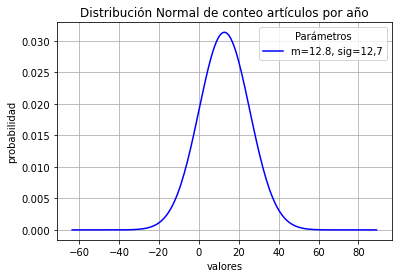

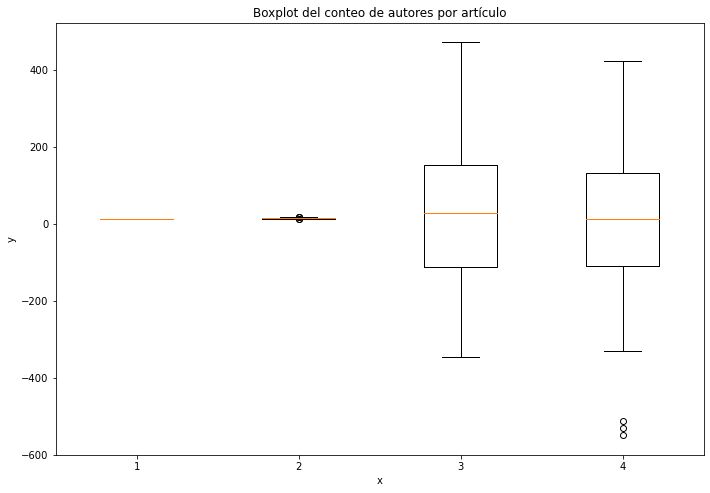

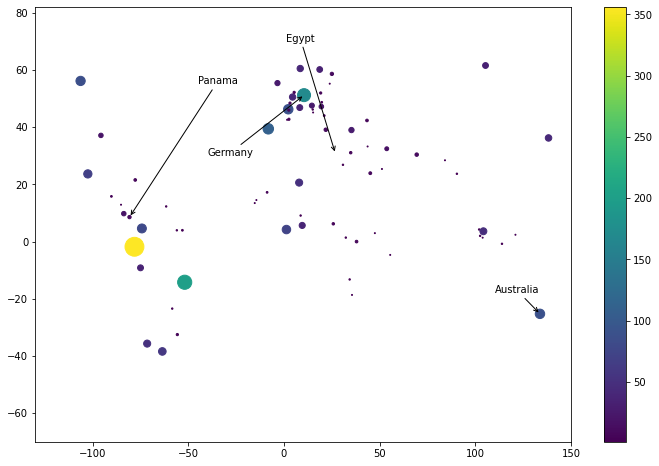

In [8]:
# pubyear
import statistics as stats
pubyear=[36,40,6,21,1,1,22,23,15,1,1,8,2,14,1]
print("media:",stats.mean(pubyear))
print("desviación estandar:",stats.pstdev(pubyear))

import numpy as np
import matplotlib.pyplot as plt
import math
 
def normal_distribution(x, mean, sigma):
    return np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)
 
mean1, sigma1 = 12.8, 12.708002727940112 
x1 = np.linspace(mean1 - 6*sigma1, mean1 + 6*sigma1, 191)
y1 = normal_distribution(x1, mean1, sigma1)

plt.plot(x1, y1, 'b', label='m=12.8, sig=12,7')
plt.legend(title = "Parámetros")
plt.title('Distribución Normal de conteo artículos por año')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.grid()
plt.show()

# pub_authors

import matplotlib.pyplot as plt
import numpy as np
  
np.random.seed(4)
 
data_1 = np.random.normal(12, 0, 200)
data_2 = np.random.normal(14, 1, 200)
data_3 = np.random.normal(7, 190, 200)
data_4 = np.random.normal(1, 191, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(9, 6))
 
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Boxplot del conteo de autores por artículo')
plt.show()

#countries

%matplotlib inline
import pandas as pd
import re
import csv
with open('data/Ecuador_genomics.txt') as f:
    my_text = f.read()
    my_text = re.sub(r'\n\s{6}', ' ', my_text)
countries = []

for ln in my_text.splitlines():
    if ln.startswith("AD  -"):
        adreess = ln[:]
        country = re.findall(r'\,\s([\sA-Za-z{2:50}]+)\.', adreess)
        countries.append(country)

import itertools
countries = list(itertools.chain.from_iterable(countries))
uniq_countries = list(set(countries))

country_coords = {}
with open('data/countryEG.txt') as f:
    csvr = csv.DictReader(f)   
    for row in csvr:
        country_coords[row['Country']] = [float(row['LT']),
                                          float(row['LG'])]
paises = []
country_long = []
country_lat = []
country_count = []
for z in uniq_countries:
    if z in country_coords.keys():
        paises.append(z)
        country_lat.append(country_coords[z][0])
        country_long.append(country_coords[z][1])
        country_count.append(countries.count(z))

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(country_long, country_lat, s = country_count, c= country_count)
plt.colorbar()
plt.xlim(-130, 150)
plt.ylim(-70, 82)
ard = dict(arrowstyle="->")
plt.annotate('Panama', xy = (-80.782127, 8.537981), 
               xytext = (-45, 55), arrowprops= ard)
plt.annotate('Germany', xy = (10.451526,51.165691), 
               xytext = (-40, 30), arrowprops = ard)
plt.annotate('Australia', xy = (133.775136,-25.274398), 
               xytext = (110, -18), arrowprops= ard)
plt.annotate('Egypt', xy = (26.820553, 30.802498), 
               xytext = (1, 70), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 2, plSize[1] * 2) )


## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

Grafica 1

En la distribucion normal se representa el conteo artículos por año, ademas existe una media de 12.8 y una desviacion estandar de 12.7 esos conteos de artículos. Sobre todo muestra la probabilidad de publicaciones que se han realizado en cada año.

Grafica 2

La grafica 2 representa el boxplot de conteo de autores por artículo, pero es este caso solo se hizo el boxplot de 4 datos y no de todos los datos de conteo, entonces nos muestra la cantidad de autores que está en cada artículo enumerado. Por ejemplo, en el artículo número 190 están un total de 7 autores. Cabe recalcar que las cajas están presentando el número de articulo, por lo que en las primeras se ven como una línea, pero en esos artículos hay 12 y 14 autores respectivamente. 

Grafica 3

En la gráfica 3 se representa la cantidad de autores y los paises donde han sido publicados los articulos. Y los otros puntos de color igual manera estan representando los paises donde estan los autores que estan relacionados con el tema Ecuador Genomic. 



## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```